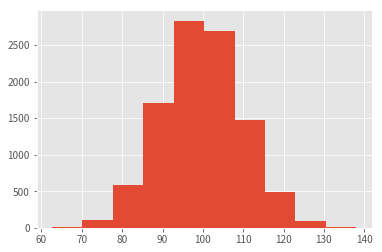

In [2]:
#히스토그램 : Axes.hist()

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#데이터 셋
mu = 100 #평균
sigma = 10 #표준편차
np.random.seed(0)
x = np.random.normal(mu,sigma, 10000)

#히스토그램 그리기
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x)

plt.show()

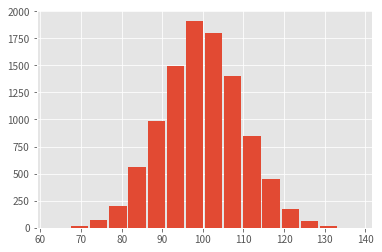

In [3]:
#인수를 설정한 히스토그램

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins=16)

plt.show()

In [5]:
import pandas as pd
anime_master_csv = './anime/anime_master.csv'

df = pd.read_csv(anime_master_csv, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


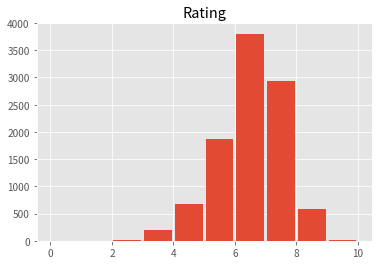

In [6]:
#평점 시각화

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['rating'], range=(0,10), rwidth=0.9)
ax.set_title('Rating')

plt.show()

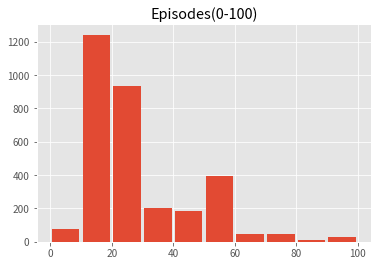

In [8]:
#범위 지정을 해야하는 경우 (처음계급으로 몰리는 잘못된거 수정)
 # range값을 수정하면 된다.
    
fig = plt.figure()
ax = fig.add_subplot(111)
df_tv = df[df['type'] == 'TV']

#range 값을 (0,100) 으로 지정
ax.hist(df_tv['episodes'], rwidth=0.9, range=(0,100))
ax.set_title("Episodes(0-100)")

plt.show()